In [ ]:
!pip install langchain langchain_community langgraph groq langchain_groq

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START
from langchain_groq import ChatGroq
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessageGraph
from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

In [ ]:
#Here we are using web search tool
!pip install -U duckduckgo-search

In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.invoke("What is AI?")

"Learn what artificial intelligence (AI) is, how it's used today, and what it may do in the future. Explore the difference between AI and machine learning, the types of AI, and the benefits and dangers of AI. Artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings. The term is frequently applied to the project of developing systems with the ability to reason, discover meaning, generalize, or learn from past experiences. AI is transforming modern life, but some critics worry about its potential misuse and environmental impact. Artificial Intelligence (AI) operates on a core set of concepts and technologies that enable machines to perform tasks that typically require human intelligence. Here are some foundational concepts: Machine Learning (ML) Machine Learning is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. I

In [ ]:
def search_duckduck(query: str):
  """ Searches Duckduckgo using Langchain duckduckgosearchrun
  """
  search = DuckDuckGoSearchRun()
  return  search.invoke(query)

result = search_duckduck("What is Agentic AI?")
print(result)

The agentic AI prize could be great, with the promise of greater productivity, innovation and insights for the human workforce. Agentic AI uses reasoning and planning to solve complex problems autonomously. Learn how it works, how it accesses data and how it can transform industries like customer service, content creation, software engineering and healthcare. An agentic AI system is designed to make decisions, handle complex situations and, in some cases, adjust its behavior autonomously. In the last case, the AI agent operates without human oversight, instead using algorithms and environmental data to optimize its behavior. Agentic AI is an autonomous AI system that plans, reasons and acts to complete tasks with minimal oversight. We'll give its characteristics and real-world examples in this article. Learn about agentic AI, how it works, its applications and challenges, and how it differs from traditional AI.


In [ ]:
#create another tool
from langchain_core.tools import tool


def multiply(a:int,b:int) -> int:
    """
    Multiply a and b
    """
    return a * b


def add(a:int,b:int) -> int:
    """
    Adds a and b
    """
    return a + b

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(model= "deepseek-r1-distill-llama-70b", temperature=0, api_key= "your-api-key")

In [ ]:
llm.invoke("Hello").content

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

In [ ]:
#connecting tools
tools = [search_duckduck, add, multiply]

llm_with_tools = llm.bind_tools(tools)

In [ ]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}



In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

#Define nodes
graph_builder.add_node("assitant", chatbot)
graph_builder.add_node("tools", ToolNode(tools))

#define edges
graph_builder.add_edge(START, "assitant")
graph_builder.add_conditional_edges("assitant", tools_condition)
graph_builder.add_edge("tools", "assitant")

react_graph = graph_builder.compile()

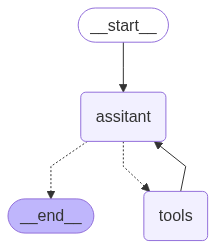

In [ ]:
#Lets see the connection graph visually
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [ ]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in delhi. Multiply it by 2 and add 5.")]})
print(response["messages"])


[HumanMessage(content='what is the weather in delhi. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='fc8a61a9-e203-42f1-a614-9b34d580c0be'), AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, so the user is asking about the weather in Delhi and then wants to multiply that by 2 and add 5. Hmm, first, I need to figure out what exactly they mean by "weather." Are they referring to the temperature? Probably, since that\'s a common use case.\n\nOkay, I should start by searching for the current temperature in Delhi. I\'ll use the DuckDuckGo search tool for that. Once I have the temperature, the next step is to multiply it by 2. Let me make sure I have the multiply function available. Oh, right, there\'s a multiply tool that takes two integers. So I\'ll use that with the temperature and 2.\n\nAfter multiplying, I need to add 5. There\'s an add tool as well, which is perfect for this. I\'ll take the result from the multiplication and add 5 to 

In [ ]:
for m in response["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is the weather in delhi. Multiply it by 2 and add 5.
================================== Ai Message ==================================
Tool Calls:
  search_duckduck (bv30kjxcw)
 Call ID: bv30kjxcw
  Args:
    query: weather in Delhi
================================= Tool Message =================================
Name: search_duckduck

New Delhi anticipates a humid Wednesday. Patchy light rain is expected. Temperatures will range from 30.2°C to 37.6°C. Showers are likely in the afternoon and evening. The AQI is moderate. Residents should carry umbrellas. Moderate rain is expected tomorrow. Temperatures will range from 28.7°C to 34.5°C. The chance of rain is 88%. Prepare for wet conditions. New Delhi, India - Current temperature and weather conditions. Detailed hourly weather forecast for today - including weather conditions, temperature, pressure, humidity, precipitation, dewpoint, wind, visibility, an